## <font style="color:yellow">2ª Atividade Prática</font>

#### Introdução a Processamento Digital de Imagens

Dupla: Anne Karolinne Dias e Dayany Lima  

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### 1) Teste o algoritmo com as imagens em tons de cinza dadas. Exiba os resultados comparando os histogramas obtidos antes e depois do processamento.

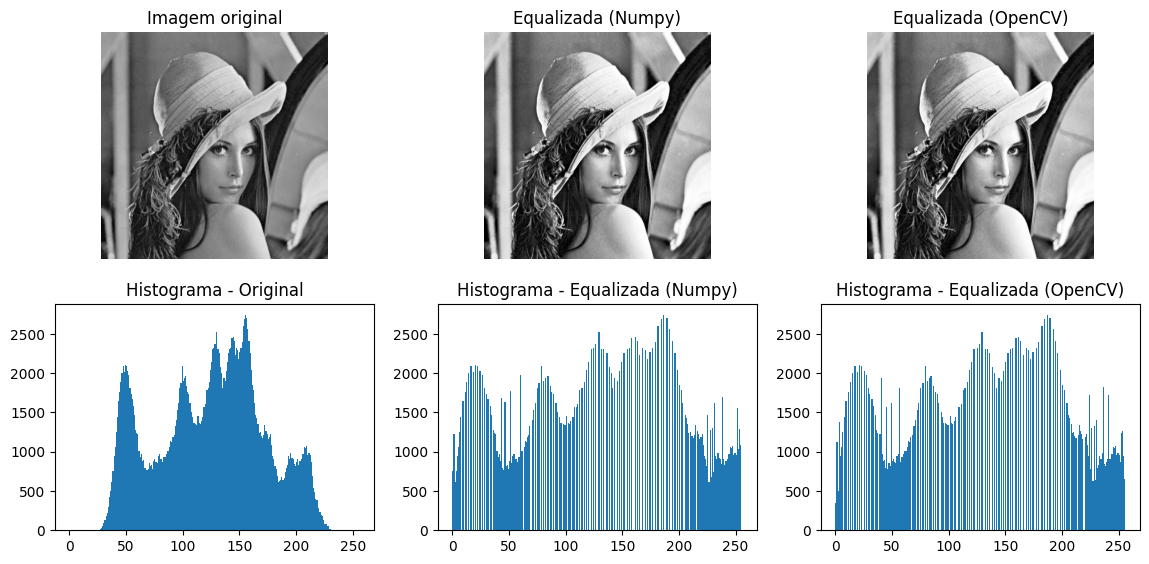

In [2]:
image = cv2.imread("lena_gray_512.tif", cv2.IMREAD_GRAYSCALE)

IMG_NUM_PIXELS = image.size
IMG_COLOR_RANGE = 256

pixels_distribution = np.bincount(image.flatten(), minlength=IMG_COLOR_RANGE)

probability = pixels_distribution / IMG_NUM_PIXELS

cumulative_distribution = np.cumsum(probability)

sk = np.uint8(255 * cumulative_distribution)

equalized_image = sk[image]

cv2_normalized_image = cv2.equalizeHist(image)

fig = plt.figure(figsize=(14, 10))

fig.add_subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Imagem original")

fig.add_subplot(3, 3, 4)
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histograma - Original")

fig.add_subplot(3, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (Numpy)")

fig.add_subplot(3, 3, 5)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (Numpy)")

fig.add_subplot(3, 3, 3)
plt.imshow(cv2_normalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (OpenCV)")

fig.add_subplot(3, 3, 6)
plt.hist(cv2_normalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (OpenCV)")

plt.show()

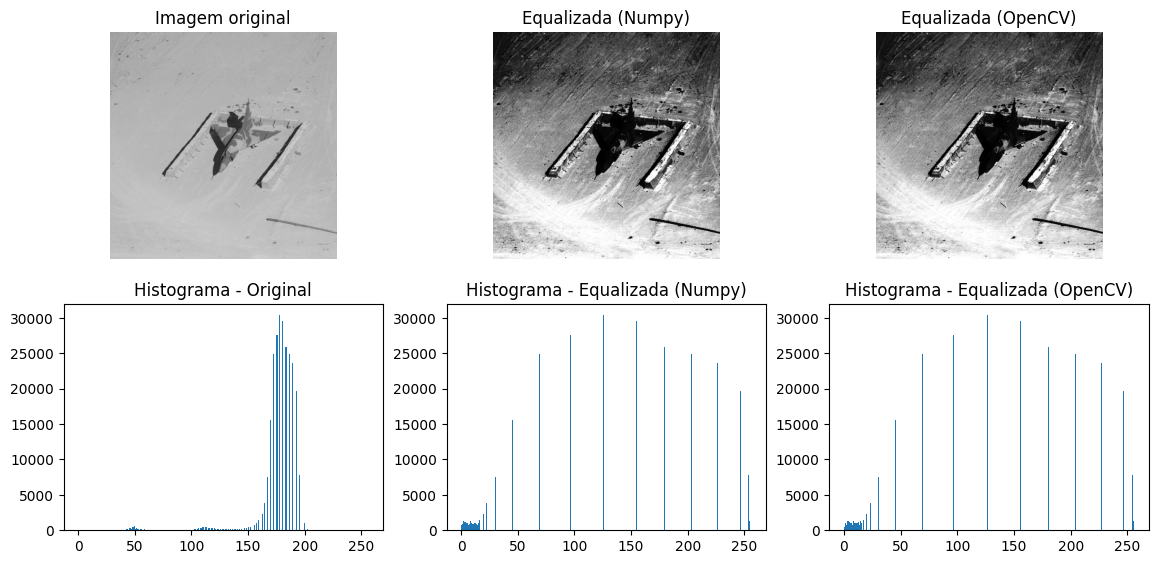

In [3]:
image = cv2.imread("aviao.tiff", cv2.IMREAD_GRAYSCALE)

IMG_NUM_PIXELS = image.size
IMG_COLOR_RANGE = 256

pixels_distribution = np.bincount(image.flatten(), minlength=IMG_COLOR_RANGE)

probability = pixels_distribution / IMG_NUM_PIXELS

cumulative_distribution = np.cumsum(probability)

sk = np.uint8(255 * cumulative_distribution)

equalized_image = sk[image]

cv2_normalized_image = cv2.equalizeHist(image)

fig = plt.figure(figsize=(14, 10))

fig.add_subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Imagem original")

fig.add_subplot(3, 3, 4)
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histograma - Original")

fig.add_subplot(3, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (Numpy)")

fig.add_subplot(3, 3, 5)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (Numpy)")

fig.add_subplot(3, 3, 3)
plt.imshow(cv2_normalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (OpenCV)")

fig.add_subplot(3, 3, 6)
plt.hist(cv2_normalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (OpenCV)")

plt.show()

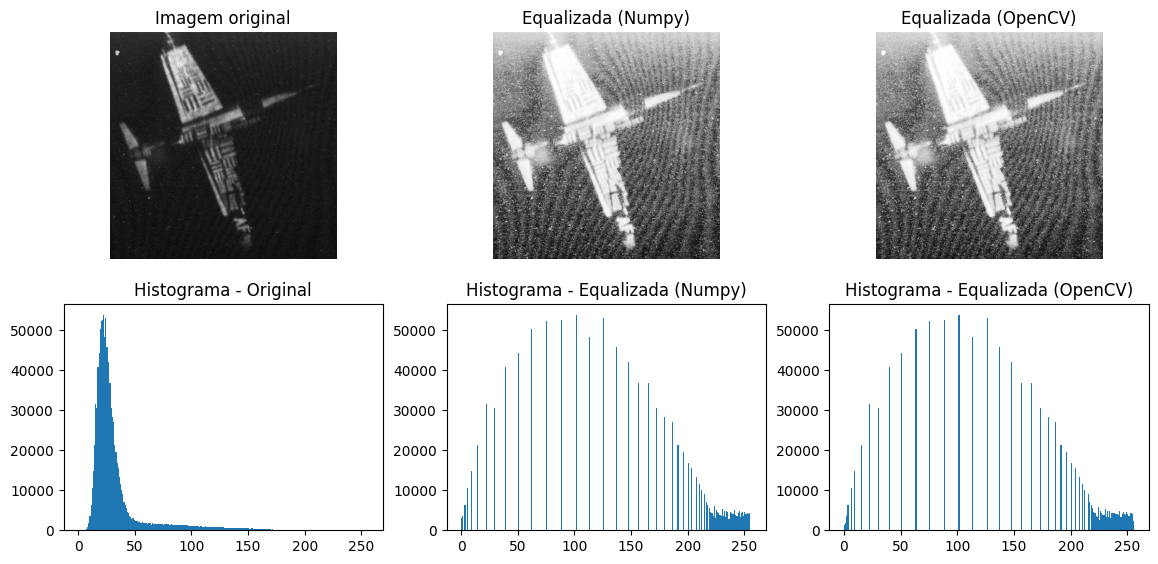

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("aviao2.tiff", cv2.IMREAD_GRAYSCALE)

IMG_NUM_PIXELS = image.size
IMG_COLOR_RANGE = 256

pixels_distribution = np.bincount(image.flatten(), minlength=IMG_COLOR_RANGE)

probability = pixels_distribution / IMG_NUM_PIXELS

cumulative_distribution = np.cumsum(probability)

sk = np.uint8(255 * cumulative_distribution)

equalized_image = sk[image]

cv2_normalized_image = cv2.equalizeHist(image)

fig = plt.figure(figsize=(14, 10))

fig.add_subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Imagem original")

fig.add_subplot(3, 3, 4)
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histograma - Original")

fig.add_subplot(3, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (Numpy)")

fig.add_subplot(3, 3, 5)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (Numpy)")

fig.add_subplot(3, 3, 3)
plt.imshow(cv2_normalized_image, cmap='gray')
plt.axis('off')
plt.title("Equalizada (OpenCV)")

fig.add_subplot(3, 3, 6)
plt.hist(cv2_normalized_image.ravel(), 256, [0, 256])
plt.title("Histograma - Equalizada (OpenCV)")

plt.show()

#### 2) Realize a equalizacao da imagem colorida utilizando todas as bandas no espaço rgb e, no espaço hsv, escolha uma ou mais bandas para realizar tal tarefa. Analise e discuta os resultados obtidos.

#### Resultados: Comparado com a equalização RGB, a equalização HSV preservou em até certo modo a cor original da imagem, mantendo sua aparência geral, mas melhorando o constraste da imagem, a cor da imagem ficou mais realista em relação ao mundo real.

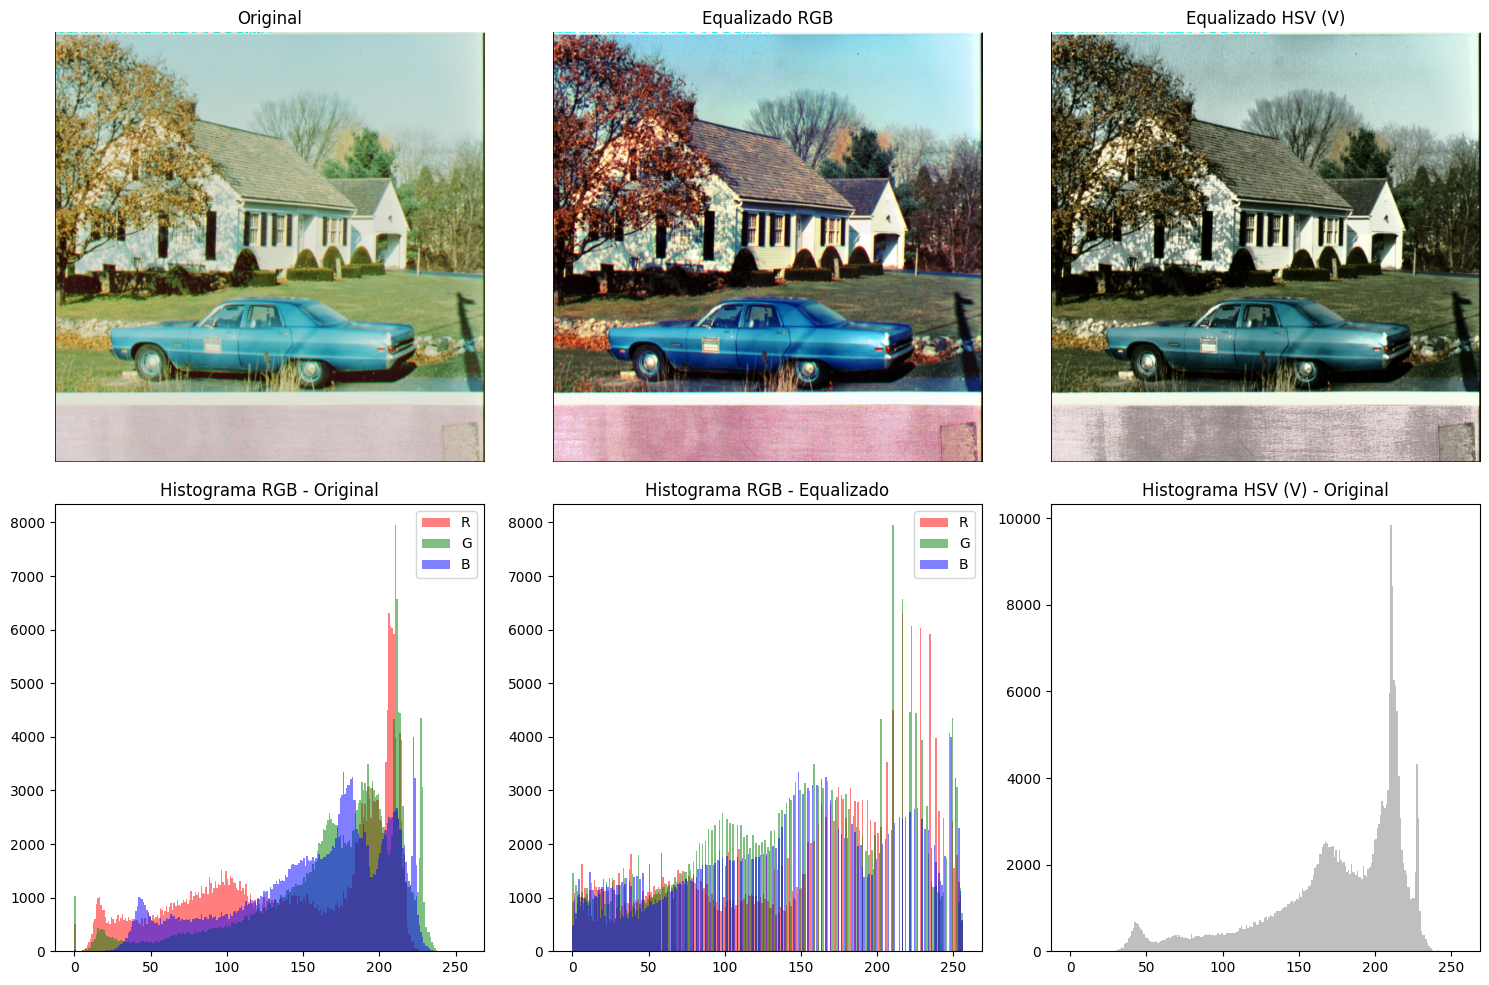

In [5]:
image = cv2.imread("imagem_colorida.tiff")
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
equalized_rgb = [cv2.equalizeHist(image[:, :, i]) for i in range(3)]
equalized_rgb = np.stack(equalized_rgb, axis=-1)
equalized_hsv = image_hsv.copy()
equalized_hsv[:, :, 2] = cv2.equalizeHist(image_hsv[:, :, 2])
equalized_hsv_bgr = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(equalized_rgb, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Equalizado RGB")
axs[0, 1].axis('off')

# Equalização no espaço HSV (apenas banda V)
axs[0, 2].imshow(cv2.cvtColor(equalized_hsv_bgr, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Equalizado HSV (V)")
axs[0, 2].axis('off')

# Histogramas da imagem original no espaço RGB
axs[1, 0].hist(image[:, :, 0].ravel(), 256, [0, 256], color='r', alpha=0.5, label='R')
axs[1, 0].hist(image[:, :, 1].ravel(), 256, [0, 256], color='g', alpha=0.5, label='G')
axs[1, 0].hist(image[:, :, 2].ravel(), 256, [0, 256], color='b', alpha=0.5, label='B')
axs[1, 0].set_title("Histograma RGB - Original")
axs[1, 0].legend()

# Histogramas da imagem equalizada no espaço RGB
axs[1, 1].hist(equalized_rgb[:, :, 0].ravel(), 256, [0, 256], color='r', alpha=0.5, label='R')
axs[1, 1].hist(equalized_rgb[:, :, 1].ravel(), 256, [0, 256], color='g', alpha=0.5, label='G')
axs[1, 1].hist(equalized_rgb[:, :, 2].ravel(), 256, [0, 256], color='b', alpha=0.5, label='B')
axs[1, 1].set_title("Histograma RGB - Equalizado")
axs[1, 1].legend()

# Histograma da imagem original no espaço HSV (apenas banda V)
axs[1, 2].hist(image_hsv[:, :, 2].ravel(), 256, [0, 256], color='gray', alpha=0.5)
axs[1, 2].set_title("Histograma HSV (V) - Original")

plt.tight_layout()
plt.show()
